In [27]:
from src.metrics.utils import early_stopping, early_stopping_loss, get_mean_window
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

latex = True
#plotting and colour set ups
if latex:
#     matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
#         'text.usetex': True,
        'pgf.rcfonts': False,
    })

def load_json_metrics(file_path):
    with open(file_path, 'r') as fp:
        metrics = json.load(fp)
    return metrics

In [2]:
stopping_epochs = 30
avg_half_window = 5

In [3]:
ill_path = '/home/dsola/repos/PGA-Net/results/illumination'

In [4]:
json_names = os.listdir(ill_path)
json_names_iou = [x for x in json_names if 'iou' in x]
json_names_acc = [x for x in json_names if 'acc' in x]
json_names_loss = [x for x in json_names if 'loss' in x]

In [5]:
d_iou, d_acc, stop = {}, {}, {}

In [6]:
d_iou['full_unet'] = [x for x in json_names_iou if 'unet' in x and 'dsc' not in x and 'lbc' not in x and 'small' not in x]
d_iou['small_unet'] = [x for x in json_names_iou if 'unet' in x and 'dsc' not in x and 'lbc' not in x and 'small' in x]
d_iou['full_dsc_unet'] = [x for x in json_names_iou if 'unet' in x and 'dsc' in x and 'lbc' not in x and 'small' not in x]
d_iou['small_dsc_unet'] = [x for x in json_names_iou if 'unet' in x and 'dsc' in x and 'lbc' not in x and 'small' in x]
d_iou['full_lbc_unet'] = [x for x in json_names_iou if 'unet' in x and 'dsc' not in x and 'lbc' in x and 'small' not in x]
d_iou['small_lbc_unet'] = [x for x in json_names_iou if 'unet' in x and 'dsc' not in x and 'lbc' in x and 'small' in x]
d_iou['full_dsc_lbc_unet'] = [x for x in json_names_iou if 'unet' in x and 'dsc' in x and 'lbc' in x and 'small' not in x]
d_iou['small_dsc_lbc_unet'] = [x for x in json_names_iou if 'unet' in x and 'dsc' in x and 'lbc' in x and 'small' in x]
d_iou['lraspp_mobile_net'] = [x for x in json_names_iou if 'lraspp' in x]

d_acc['full_unet'] = [x for x in json_names_acc if 'unet' in x and 'dsc' not in x and 'lbc' not in x and 'small' not in x]
d_acc['small_unet'] = [x for x in json_names_acc if 'unet' in x and 'dsc' not in x and 'lbc' not in x and 'small' in x]
d_acc['full_dsc_unet'] = [x for x in json_names_acc if 'unet' in x and 'dsc' in x and 'lbc' not in x and 'small' not in x]
d_acc['small_dsc_unet'] = [x for x in json_names_acc if 'unet' in x and 'dsc' in x and 'lbc' not in x and 'small' in x]
d_acc['full_lbc_unet'] = [x for x in json_names_acc if 'unet' in x and 'dsc' not in x and 'lbc' in x and 'small' not in x]
d_acc['small_lbc_unet'] = [x for x in json_names_acc if 'unet' in x and 'dsc' not in x and 'lbc' in x and 'small' in x]
d_acc['full_dsc_lbc_unet'] = [x for x in json_names_acc if 'unet' in x and 'dsc' in x and 'lbc' in x and 'small' not in x]
d_acc['small_dsc_lbc_unet'] = [x for x in json_names_acc if 'unet' in x and 'dsc' in x and 'lbc' in x and 'small' in x]
d_acc['lraspp_mobile_net'] = [x for x in json_names_acc if 'lraspp' in x]

In [7]:
results_iou_25 = {}
for model in d_iou.keys():
    iou_list = []
    for i, model_json in enumerate(d_iou[model]):
        if '25_eval' in model_json:
            metric_dict = load_json_metrics(os.path.join(ill_path, model_json))
            metric_list = list(metric_dict.values())
            argmx = np.argmax(metric_list)
            stop[model] = argmx
            mean_score = np.mean(metric_list[max(0, argmx-avg_half_window):min(argmx+avg_half_window, len(metric_list))])
    #         print(f'{model} IoU {i}: ', mean_score)
            iou_list.append(mean_score)
    #     miou = np.mean(iou_list)
    #     std_iou = np.std(iou_list)
    #     print(f'{model} mean IoU: ', miou)
    results_iou_25[model] = iou_list
    
results_iou_200 = {}
for model in d_iou.keys():
    iou_list = []
    for i, model_json in enumerate(d_iou[model]):
        if '200_eval' in model_json:
            metric_dict = load_json_metrics(os.path.join(ill_path, model_json))
            metric_list = list(metric_dict.values())
            argmx = np.argmax(metric_list)
            stop[model] = argmx
            mean_score = np.mean(metric_list[max(0, argmx-avg_half_window):min(argmx+avg_half_window, len(metric_list))])
    #         print(f'{model} IoU {i}: ', mean_score)
            iou_list.append(mean_score)
    #     miou = np.mean(iou_list)
    #     std_iou = np.std(iou_list)
    #     print(f'{model} mean IoU: ', miou)
    results_iou_200[model] = iou_list
    
results_iou_120 = {}
for model in d_iou.keys():
    iou_list = []
    for i, model_json in enumerate(d_iou[model]):
        if '120_eval' in model_json:
            metric_dict = load_json_metrics(os.path.join(ill_path, model_json))
            metric_list = list(metric_dict.values())
            argmx = np.argmax(metric_list)
            stop[model] = argmx
            mean_score = np.mean(metric_list[max(0, argmx-avg_half_window):min(argmx+avg_half_window, len(metric_list))])
    #         print(f'{model} IoU {i}: ', mean_score)
            iou_list.append(mean_score)
    #     miou = np.mean(iou_list)
    #     std_iou = np.std(iou_list)
    #     print(f'{model} mean IoU: ', miou)
    results_iou_120[model] = iou_list
    
results_iou_75 = {}
for model in d_iou.keys():
    iou_list = []
    for i, model_json in enumerate(d_iou[model]):
        if '75_eval' in model_json:
            metric_dict = load_json_metrics(os.path.join(ill_path, model_json))
            metric_list = list(metric_dict.values())
            argmx = np.argmax(metric_list)
            stop[model] = argmx
            mean_score = np.mean(metric_list[max(0, argmx-avg_half_window):min(argmx+avg_half_window, len(metric_list))])
    #         print(f'{model} IoU {i}: ', mean_score)
            iou_list.append(mean_score)
    #     miou = np.mean(iou_list)
    #     std_iou = np.std(iou_list)
    #     print(f'{model} mean IoU: ', miou)
    results_iou_75[model] = iou_list

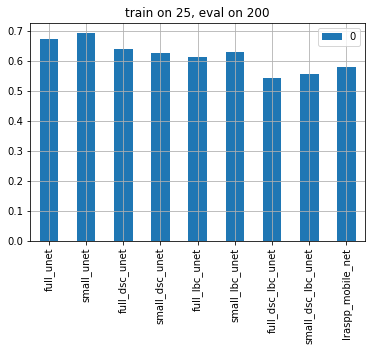

In [8]:
ax = pd.DataFrame.from_dict(results_iou_200, orient='index').plot.bar(title='train on 25, eval on 200')
ax.grid();

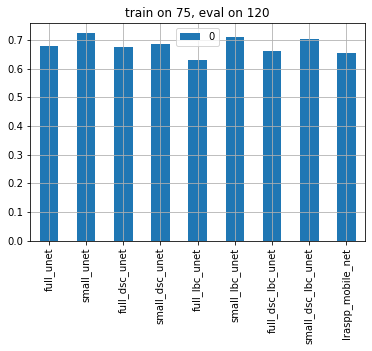

In [9]:
ax = pd.DataFrame.from_dict(results_iou_120, orient='index').plot.bar(title='train on 75, eval on 120')
ax.grid()

In [16]:
results_iou_120.keys()

dict_keys(['full_unet', 'small_unet', 'full_dsc_unet', 'small_dsc_unet', 'full_lbc_unet', 'small_lbc_unet', 'full_dsc_lbc_unet', 'small_dsc_lbc_unet', 'lraspp_mobile_net'])

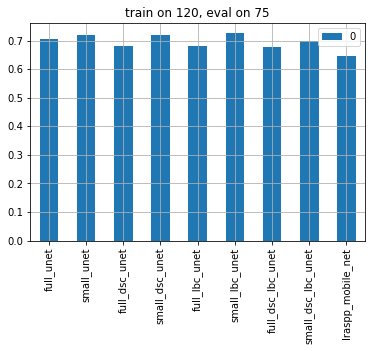

In [10]:
ax = pd.DataFrame.from_dict(results_iou_75, orient='index').plot.bar(title='train on 120, eval on 75')
ax.grid();

In [8]:
results_iou_120

{'full_unet': [0.6788942873477936],
 'small_unet': [0.723199987411499],
 'full_dsc_unet': [0.6744955956935883],
 'small_dsc_unet': [0.686537915468216],
 'full_lbc_unet': [0.6293327748775482],
 'small_lbc_unet': [0.7095723390579224],
 'full_dsc_lbc_unet': [0.6612249195575715],
 'small_dsc_lbc_unet': [0.7055102527141571],
 'lraspp_mobile_net': [0.6544678747653961]}

In [40]:
desired_order_list = ['full_unet', 'full_dsc_unet', 'full_lbc_unet', 'full_dsc_lbc_unet', 'small_unet', 'small_dsc_unet', 'small_lbc_unet', 'small_dsc_lbc_unet', 'lraspp_mobile_net']

# results_iou_120 = {k: results_iou_120[k] for k in desired_order_list}
# results_iou_75 = {k: results_iou_75[k][0] for k in desired_order_list}
results_iou_200 = {k: results_iou_200[k][0] for k in desired_order_list}
results_iou_25 = {k: results_iou_25[k][0] for k in desired_order_list}

In [22]:
results_iou_75

{'full_unet': 0.7074471712112427,
 'full_dsc_unet': 0.6822061777114868,
 'full_lbc_unet': 0.6833955585956574,
 'full_dsc_lbc_unet': 0.6795518696308136,
 'small_unet': 0.7206790149211884,
 'small_dsc_unet': 0.7219695627689362,
 'small_lbc_unet': 0.7257191836833954,
 'small_dsc_lbc_unet': 0.6992174506187439,
 'lraspp_mobile_net': 0.6458892107009888}

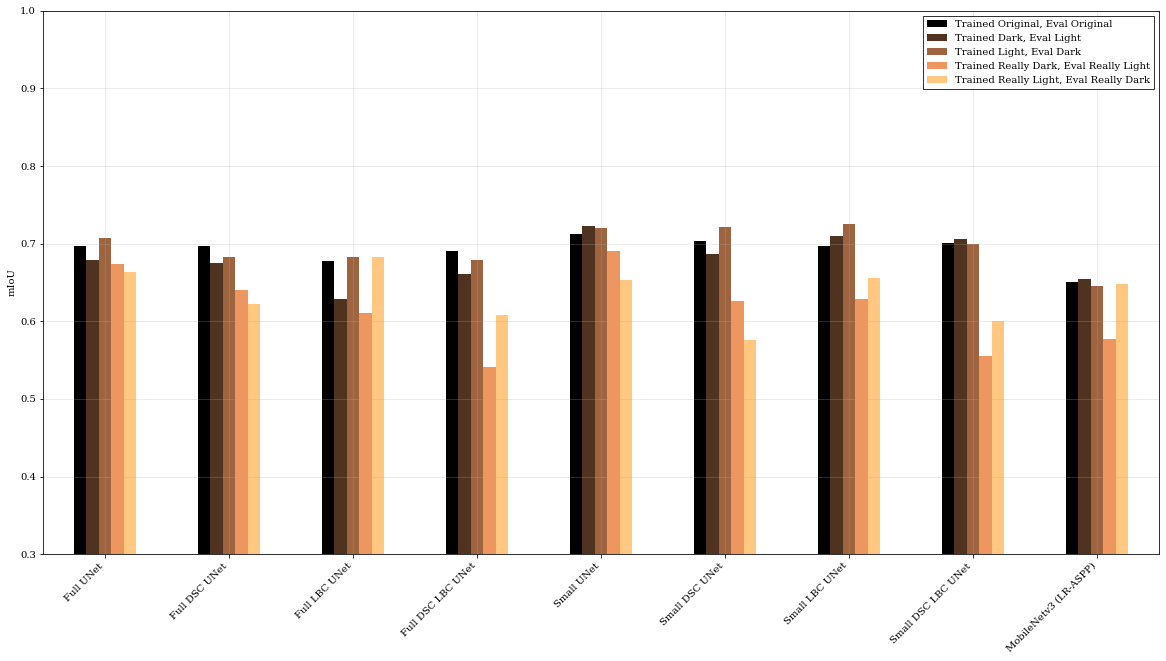

In [46]:


df = pd.DataFrame({'Trained Original, Eval Original': [0.697, 0.697, 0.677, 0.691, 0.712, 0.704, 0.697, 0.701, 0.651], 
                   'Trained Dark, Eval Light': results_iou_120.values(), 
                   'Trained Light, Eval Dark': results_iou_75.values(), 
                   'Trained Really Dark, Eval Really Light': results_iou_200.values(), 
                   'Trained Really Light, Eval Really Dark': results_iou_25.values()}, 
                  index=['Full UNet', 'Full DSC UNet', 'Full LBC UNet', 'Full DSC LBC UNet', 'Small UNet', 'Small DSC UNet', 'Small LBC UNet', 'Small DSC LBC UNet', 'MobileNetv3 (LR-ASPP)'])
fig, ax = plt.subplots(figsize=(20,10))

df.plot.bar(rot=0, ylim=(0.3,1), colormap='copper', ax=ax)
ax.grid(alpha=0.3)
ax.set_ylabel('mIoU')
plt.xticks(rotation=45, horizontalalignment='right');
leg4 = ax.legend(framealpha=1.0, fancybox=False)
leg4.get_frame().set_edgecolor('k')
leg4.get_frame().set_linewidth(0.8)
leg4.get_frame().set_facecolor('w')

In [39]:
# fig.savefig("../images/illumination_bar_chart.svg", format='svg', dpi=1200)

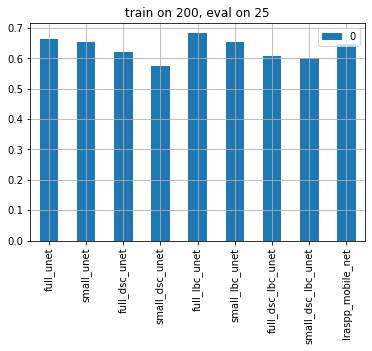

In [11]:
ax = pd.DataFrame.from_dict(results_iou_25, orient='index').plot.bar(title='train on 200, eval on 25')
ax.grid();